## MORE CLEANING/PREPROCESSING

In [1012]:
import pandas as pd
import numpy as np

import re
import string

import nltk
from nltk.corpus import stopwords
import spacy

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import NMF

In [1013]:
df = pd.read_pickle("./df_project 5.pkl")
df

,index,AUTHOR,COMPOSER,DATE,LYRICS,ORCHESTRA,SINGER,TITLE,TYPE,WORDS
0,0,Julio César Curi,Edmundo Baya,1960,Tristeza... Con el vino de mi mesa Desataste u...,Rodolfo BIAGI,Hugo Duval,"[Te, burlas, tristeza]",TANGO,124
1,4,Alejandro Romay,Roberto Rufino,1959,"La casita sobre el lago azul, el nido y luz de...",Rodolfo BIAGI,Hugo Duval,"[En, el, lago, azul]",TANGO,80
2,6,Lito Bayardo,Juan de Dios Filiberto,1959,"Flor de mburucuyá, Abre tu balcón Para mi cant...",Rodolfo BIAGI,Hugo Duval,"[La, canción]",TANGO,83
3,7,Oscar Rubens,Alberto Suárez Villanueva,1945,"Tu melodía siempre la escucho, Y donde vaya, m...",Rodolfo BIAGI,Jorge Ortiz,"[Tu, melodía]",VALS,78
4,8,Alberto Vacarezza,Raúl de los Hoyos,1956,"Chiche Moro Zaino Vamos, pingos, por fav...",Rodolfo BIAGI,Hugo Duval,"[El, carrerito]",TANGO,159
...,...,...,...,...,...,...,...,...,...,...
2466,12201,José Panizza,Edgardo Donato,1959,Yo tenía un amorcito que me dejó abandonada y ...,Osvaldo FRESEDO,Blanca Mooney,[Julian],TANGO,171
2467,13225,Miguel Andrés Fama,Miguel Andrés Fama,1939,"Sos la milonga linda Cadenciosa, rezongona, So...",Edgardo DONATO,Horacio Lagos,"[La, mimada]",MILONGA,74
2468,13270,Enrique Dizeo,Anselmo Aieta,1950,"Qué tipo de suerte que sos, mama mía Siempre...",Edgardo DONATO,Carlos Almada,"[Qué, fenómeno]",TANGO,152
2469,13284,Alberto Laureano Martínez,Enrique Santos Discépolo,1960,"Todo duele en la noche de mi soledad, Duele ve...",Domingo FEDERICO,Ruben Sanchez y Ruben Maciel,[Andrajos],TANGO,110


In [1014]:
#removing all capital letters
df.LYRICS = df.LYRICS.str.lower()

In [1015]:
#removing punctuation
df.LYRICS = df.LYRICS.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [1016]:
#downloading spanish stopwords
nltk.download('stopwords')
stops = set(stopwords.words('spanish'))
#print(stops)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krystiankrystkowiak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1017]:
#using spacy for lemma

en_core = spacy.load('es_core_news_lg')

In [1018]:
df["lemmatized"] = df['LYRICS'].apply(lambda x: " ".join([y.lemma_ for y in en_core(x)]))

In [1019]:
df

,index,AUTHOR,COMPOSER,DATE,LYRICS,ORCHESTRA,SINGER,TITLE,TYPE,WORDS,lemmatized
0,0,Julio César Curi,Edmundo Baya,1960,tristeza con el vino de mi mesa desataste u...,Rodolfo BIAGI,Hugo Duval,"[Te, burlas, tristeza]",TANGO,124,tristeza con el vino de mi mesa desataste ...
1,4,Alejandro Romay,Roberto Rufino,1959,la casita sobre el lago azul el nido y luz de...,Rodolfo BIAGI,Hugo Duval,"[En, el, lago, azul]",TANGO,80,el casita sobre el lago azul el nido y luz d...
2,6,Lito Bayardo,Juan de Dios Filiberto,1959,flor de mburucuyá abre tu balcón para mi cant...,Rodolfo BIAGI,Hugo Duval,"[La, canción]",TANGO,83,flor de mburucuyá abrir tu balcón para mi ca...
3,7,Oscar Rubens,Alberto Suárez Villanueva,1945,tu melodía siempre la escucho y donde vaya m...,Rodolfo BIAGI,Jorge Ortiz,"[Tu, melodía]",VALS,78,tu melodía siempre él escuchar y donde ir ...
4,8,Alberto Vacarezza,Raúl de los Hoyos,1956,chiche moro zaino vamos pingos por fav...,Rodolfo BIAGI,Hugo Duval,"[El, carrerito]",TANGO,159,chiche moro zaino ir pingo por f...
...,...,...,...,...,...,...,...,...,...,...,...
2466,12201,José Panizza,Edgardo Donato,1959,yo tenía un amorcito que me dejó abandonada y ...,Osvaldo FRESEDO,Blanca Mooney,[Julian],TANGO,171,yo tener uno amorcito que yo dejar abandonado ...
2467,13225,Miguel Andrés Fama,Miguel Andrés Fama,1939,sos la milonga linda cadenciosa rezongona so...,Edgardo DONATO,Horacio Lagos,"[La, mimada]",MILONGA,74,sos el milonga lindo cadenciós rezongona s...
2468,13270,Enrique Dizeo,Anselmo Aieta,1950,qué tipo de suerte que sos mama mía siempre...,Edgardo DONATO,Carlos Almada,"[Qué, fenómeno]",TANGO,152,qué tipo de suerte que sos mama mío siem...
2469,13284,Alberto Laureano Martínez,Enrique Santos Discépolo,1960,todo duele en la noche de mi soledad duele ve...,Domingo FEDERICO,Ruben Sanchez y Ruben Maciel,[Andrajos],TANGO,110,todo doler en el noche de mi soledad doler v...


In [1108]:
#tuning stopwords set
custom_stops = ['12', '13', '1910', '1e', '24telefoneá', '33', '80',
                '900cruzó', '900que', '911ya', '920', 'ser', 'ir', 'hacer', 'vo', 'haber', 'querer', 'ver', 'saber', 'tener', 'oh', 'si', 'pa', 'vos', 'aquel', 'ay',  'sos', 'así', 'bien']
stops.update(custom_stops)
#print(stops)

In [1109]:
#creating corpus
corpus = list(df["lemmatized"])

# LSA (svd)

In [1141]:
number_of_topics = 3

In [1142]:
vectorizer = CountVectorizer(stop_words = stops,
                     min_df = .0042,
                     ngram_range = (1,1))

doc_term = vectorizer.fit_transform(corpus)

In [1143]:
#doc_term_df = pd.DataFrame(doc_term.toarray(), index=corpus, columns=vectorizer.get_feature_names_out())

In [1144]:
lsa = TruncatedSVD(number_of_topics)
lsa.fit(doc_term)

TruncatedSVD(n_components=3)

In [1145]:
lsa.explained_variance_ratio_

array([0.02086351, 0.02461453, 0.01897485])

In [1146]:
topic_term = lsa.components_.round(3)

In [1147]:
topic_term_df = pd.DataFrame(topic_term.round(3),
#             index = ["component_1","component_2", "component_3", "component_4", "component_5"],
             columns = vectorizer.get_feature_names_out())

In [1148]:
topic_term_df

,abajo,abandonado,abandonar,abandono,abierto,abismo,abrazado,abrazar,abrazo,abrigar,...,yuyo,zaguán,zapato,zorro,zorzal,zurda,ángel,árbol,último,único
0,0.003,0.005,0.007,0.004,0.004,0.006,0.002,0.005,0.005,0.001,...,0.002,0.001,0.002,0.002,0.004,0.001,0.004,0.002,0.013,0.006
1,0.001,0.002,-0.000,-0.002,0.002,-0.002,0.000,-0.001,0.005,0.000,...,0.004,0.002,0.001,0.005,0.002,0.003,-0.002,0.002,0.011,-0.000
2,-0.005,-0.003,-0.002,-0.002,-0.002,0.001,0.000,0.004,0.003,0.000,...,0.003,-0.003,-0.003,0.000,0.004,-0.003,-0.003,-0.004,-0.012,-0.002


In [1149]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [1150]:
output = display_topics(lsa, vectorizer.get_feature_names_out(), 10)


Topic  1
amor, corazón, vida, noche, poder, hoy, decir, llorar, dolor, dar

Topic  2
tango, bailar, bandoneón, viejo, noche, barrio, arrabal, amigo, emoción, muchacho

Topic  3
amor, tango, corazón, canción, voz, soñar, bandoneón, bailar, dulce, flor




In [1230]:
display_topics(lsa, vectorizer.get_feature_names_out(), 10, ['SAD LOVE', 'SUBURB TANGO', 'TRUE LOVE'])


Topic:  SAD LOVE
amor, corazón, vida, noche, poder, hoy, decir, llorar, dolor, dar

Topic:  SUBURB TANGO
tango, bailar, bandoneón, viejo, noche, barrio, arrabal, amigo, emoción, muchacho

Topic:  TRUE LOVE
amor, tango, corazón, canción, voz, soñar, bandoneón, bailar, dulce, flor




(TruncatedSVD(n_components=3),
 array(['abajo', 'abandonado', 'abandonar', ..., 'árbol', 'último',
        'único'], dtype=object),
 10)

Topic: SAD LOVE
love, heart, life, night, power, today, say, cry, pain, give

Topic: SUBURB TANGO
tango, dance, bandoneon, old man, night, neighborhood, suburb, friend, emotion, boy

Topic: SWEET LOVE
love, tango, heart, song, voice, dream, bandoneon, dance, sweet, flower

In [1231]:
doc_topic = lsa.transform(doc_term)

In [1232]:
doc_topic_df = pd.DataFrame(doc_topic.round(3),
#                            index = corpus,
                            columns = ['SAD LOVE', 'SUBURB TANGO', 'TRUE LOVE'])

In [1234]:
doc_topic_df[doc_topic_df['TRUE LOVE'] > 4]

,SAD LOVE,SUBURB TANGO,TRUE LOVE
175,4.256,5.026,4.241
743,3.595,12.615,5.956
882,8.579,-1.831,5.546
1116,4.963,-0.692,4.151
1179,3.615,12.739,5.792
1334,3.354,7.480,4.460
1425,3.417,10.096,4.722


Looking at cosine similarity, you can see that two documents both high in component 2 (aka topic 2 aka sports) will have a similarity of 1, and two documents high in different components will have a similarity of 0.

In [1154]:
cosine_similarity((doc_topic[1], doc_topic[1])).round()

array([[1., 1.],
       [1., 1.]])

In [1155]:
result = pd.merge(df, doc_topic_df, left_index=True, right_index=True)
result

,index,AUTHOR,COMPOSER,DATE,LYRICS,ORCHESTRA,SINGER,TITLE,TYPE,WORDS,lemmatized,SAD LOVE,SUBURB MUSIC,SWEET SONG
0,0,Julio César Curi,Edmundo Baya,1960,tristeza con el vino de mi mesa desataste u...,Rodolfo BIAGI,Hugo Duval,"[Te, burlas, tristeza]",TANGO,124,tristeza con el vino de mi mesa desataste ...,1.832,0.417,-0.581
1,4,Alejandro Romay,Roberto Rufino,1959,la casita sobre el lago azul el nido y luz de...,Rodolfo BIAGI,Hugo Duval,"[En, el, lago, azul]",TANGO,80,el casita sobre el lago azul el nido y luz d...,2.967,-0.691,0.839
2,6,Lito Bayardo,Juan de Dios Filiberto,1959,flor de mburucuyá abre tu balcón para mi cant...,Rodolfo BIAGI,Hugo Duval,"[La, canción]",TANGO,83,flor de mburucuyá abrir tu balcón para mi ca...,2.169,-0.002,0.767
3,7,Oscar Rubens,Alberto Suárez Villanueva,1945,tu melodía siempre la escucho y donde vaya m...,Rodolfo BIAGI,Jorge Ortiz,"[Tu, melodía]",VALS,78,tu melodía siempre él escuchar y donde ir ...,2.906,-0.301,0.920
4,8,Alberto Vacarezza,Raúl de los Hoyos,1956,chiche moro zaino vamos pingos por fav...,Rodolfo BIAGI,Hugo Duval,"[El, carrerito]",TANGO,159,chiche moro zaino ir pingo por f...,1.532,1.147,-0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,12201,José Panizza,Edgardo Donato,1959,yo tenía un amorcito que me dejó abandonada y ...,Osvaldo FRESEDO,Blanca Mooney,[Julian],TANGO,171,yo tener uno amorcito que yo dejar abandonado ...,4.921,0.795,0.938
2467,13225,Miguel Andrés Fama,Miguel Andrés Fama,1939,sos la milonga linda cadenciosa rezongona so...,Edgardo DONATO,Horacio Lagos,"[La, mimada]",MILONGA,74,sos el milonga lindo cadenciós rezongona s...,1.050,0.651,-0.280
2468,13270,Enrique Dizeo,Anselmo Aieta,1950,qué tipo de suerte que sos mama mía siempre...,Edgardo DONATO,Carlos Almada,"[Qué, fenómeno]",TANGO,152,qué tipo de suerte que sos mama mío siem...,1.334,0.297,-1.237
2469,13284,Alberto Laureano Martínez,Enrique Santos Discépolo,1960,todo duele en la noche de mi soledad duele ve...,Domingo FEDERICO,Ruben Sanchez y Ruben Maciel,[Andrajos],TANGO,110,todo doler en el noche de mi soledad doler v...,2.602,-0.676,0.399


In [1156]:
result.describe()

,index,DATE,WORDS,SAD LOVE,SUBURB MUSIC,SWEET SONG
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,4523.177661,1944.304330,146.907730,2.893749,0.127037,-0.156224
std,2825.836198,8.616742,47.818199,1.280419,1.390758,1.221080
min,0.000000,1927.000000,21.000000,0.016000,-3.367000,-4.333000
25%,2435.000000,1939.000000,117.000000,2.008000,-0.571000,-0.964500
50%,4061.000000,1944.000000,150.000000,2.767000,-0.027000,-0.259000
75%,6270.500000,1951.000000,174.000000,3.709500,0.433000,0.534500
max,13289.000000,1960.000000,894.000000,8.579000,12.739000,5.956000


In [1206]:
result.LYRICS[2466] #strong "SAD LOVE"

'yo tenía un amorcito que me dejó abandonada y en mis horas de tristeza lo recuerdo en el alma  era un tigre para el tango y envidia del cabaret  pero un día  traicionero  tras de otra se me fue   ¿por qué me dejaste  mi lindo julián  tu nena se muere de pena y afán    en aquel cuartito nadie más entró y paso las noches llorando tu amor   amor que fingiste hasta que caí    con besos me hiciste llorar y reír y desde aquel día  mi lindo julián  no tengo alegría  me muero de afán   nene   cómo extraño tus caricias  tus mimos y tus sonrisas  dame de nuevo tu corazón y he de pagarte contenta con mil besos de pasión  negro  yo nunca podré olvidarte    piensa que en el nido abandonado un corazón destrozado sólo puede perdonar   yo tenía un amorcito que era envidia del pigall    era un tigre para el tango y se llamaba julián    pero un día  entusiasmado por una loca ilusión  dejó el nido abandonado y destrozó mi corazón '

'I had a sweetheart who left me abandoned and in my hours of sadness I remember him in my soul he was a tiger for tango and envy for cabaret but one treacherous day after another he left me why did you leave me my pretty julián your baby she dies of sorrow and eagerness in that little room no one else came in and I spend the nights crying your love love that you pretended until I fell with kisses you made me cry and laugh and since that day my beautiful julián I have no joy I die of eagerness baby how I miss your caresses your cuddles and your smiles give me your heart again and I will repay you happy with a thousand kisses of passion black I will never be able to forget you think that in the abandoned nest a broken heart can only forgive I had a sweetheart who was envious of the pigall it was a tiger for tango and his name was julián but one day excited by a crazy illusion he left the nest abandoned and broke my heart '

In [1218]:
result.LYRICS[743]

'a mi me gusta el tango  pero el tango  aquel que fue tildado de guarango  que entró a copar la banca a los lanceros con su alma de arrabal y su pañuelo     a mi me gusta el tango  pero el tango que  pese a que era huraño y era guapo  sabía con acento sensiblero entrar al corazón de las parejas de ayer   tango como ese del tiempo de antes  medio sencillo  medio compadre  con sus desplantes  como era el tango cuando era tango con otro traje    tango como ese del tiempo de antes  agua florida  luz de puñales  tango que añoran los arrabales  tango de un tiempo que dio que hablar    a mi me gusta el tango  pero el tango que me hable de arrabal y de fandango  el tango de pañuelo y alpargata que selle cada corte con su marca  a mi me gusta el tango  pero el tango que tenga cara triste y gesto guapo  y apriete en la cintura de las mozas la mano del varón  como un reclamo de amor '

# NMF

In [1337]:
number_of_topics = 3

In [1338]:
vectorizer = CountVectorizer(stop_words = stops,
                     min_df = .0042,
                     ngram_range = (1,1))

In [1339]:


doc_term = vectorizer.fit_transform(corpus) #nndsvda; this helps the solver to contend with sparsity
nmf = NMF(number_of_topics, init = "nndsvda")
nmf.fit(doc_term)

NMF(init='nndsvda', n_components=3)

In [1340]:
topic_term = nmf.components_.round(3)

In [1341]:
topic_term_df = pd.DataFrame(topic_term.round(3),
#             index = ["component_1","component_2", "component_3", "component_4", "component_5"],
             columns = vectorizer.get_feature_names_out())

In [1342]:
topic_term_df

,abajo,abandonado,abandonar,abandono,abierto,abismo,abrazado,abrazar,abrazo,abrigar,...,yuyo,zaguán,zapato,zorro,zorzal,zurda,ángel,árbol,último,único
0,0.054,0.080,0.081,0.052,0.057,0.044,0.013,0.021,0.033,0.014,...,0.010,0.026,0.035,0.018,0.012,0.030,0.048,0.041,0.233,0.073
1,0.000,0.020,0.005,0.000,0.018,0.000,0.008,0.018,0.064,0.007,...,0.044,0.004,0.005,0.042,0.027,0.011,0.000,0.003,0.078,0.009
2,0.000,0.023,0.062,0.023,0.018,0.071,0.019,0.081,0.055,0.014,...,0.025,0.000,0.000,0.002,0.051,0.000,0.031,0.000,0.010,0.045


In [1343]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [1344]:
output = display_topics(nmf, vectorizer.get_feature_names_out(), 10)


Topic  1
vida, noche, decir, dar, volver, llorar, hoy, poder, viejo, corazón

Topic  2
tango, bailar, bandoneón, corazón, emoción, noche, arrabal, voz, cantar, canción

Topic  3
amor, corazón, dolor, alma, vivir, ilusión, soñar, sueño, poder, vida




In [1345]:
display_topics(nmf, vectorizer.get_feature_names_out(), 10, ['DARK LOVE', 'SUBURB MUSIC', 'DREAMS OF LOVE']);


Topic:  DARK LOVE
vida, noche, decir, dar, volver, llorar, hoy, poder, viejo, corazón

Topic:  SUBURB MUSIC
tango, bailar, bandoneón, corazón, emoción, noche, arrabal, voz, cantar, canción

Topic:  DREAMS OF LOVE
amor, corazón, dolor, alma, vivir, ilusión, soñar, sueño, poder, vida




Topic: DARK LOVE
life, night, say, give, return, cry, today, power, old, heart

Topic: SUBURB MUSIC
tango, dance, bandoneon, heart, emotion, night, suburb, voice, sing, song

Topic: DREAMS OF LOVE
love, heart, pain, soul, live, illusion, dream, sleep, power, life

In [1346]:
doc_topic = nmf.transform(doc_term)

In [1347]:
doc_topic_df = pd.DataFrame(doc_topic.round(5),
#                            index = corpus,
                            columns = ['DARK LOVE', 'SUBURB MUSIC', 'DREAMS OF LOVE'])
### END SOLUTION
doc_topic_df

,DARK LOVE,SUBURB MUSIC,DREAMS OF LOVE
0,0.14585,0.02982,0.02916
1,0.07548,0.00000,0.22111
2,0.04471,0.05485,0.15626
3,0.07141,0.04484,0.20627
4,0.09767,0.13220,0.02160
...,...,...,...
2466,0.17829,0.22243,0.25641
2467,0.07917,0.06582,0.00813
2468,0.14981,0.00000,0.00000
2469,0.08846,0.00000,0.17487


In [1235]:
#LDA

In [1283]:
number_of_topics = 3

In [1284]:
from gensim import corpora, models, matutils
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [1285]:
vectorizer = CountVectorizer(stop_words = stops,
                     min_df = .0042,
                     ngram_range = (1,1))

In [1286]:
doc_term = vectorizer.fit_transform(corpus)

In [1287]:
doc_term_df = pd.DataFrame(doc_term.toarray(), columns=vectorizer.get_feature_names_out())
doc_term_df

,abajo,abandonado,abandonar,abandono,abierto,abismo,abrazado,abrazar,abrazo,abrigar,...,yuyo,zaguán,zapato,zorro,zorzal,zurda,ángel,árbol,último,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1288]:
term_doc = doc_term.transpose()
corpusX = matutils.Sparse2Corpus(term_doc)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpusX, num_topics=number_of_topics, id2word=id2word, passes=10)
lda

2022-09-29 21:05:23,594 : INFO : using symmetric alpha at 0.3333333333333333
2022-09-29 21:05:23,595 : INFO : using symmetric eta at 0.3333333333333333
2022-09-29 21:05:23,596 : INFO : using serial LDA version on this node
2022-09-29 21:05:23,597 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 2471 documents, updating model once every 2000 documents, evaluating perplexity every 2471 documents, iterating 50x with a convergence threshold of 0.001000
2022-09-29 21:05:23,615 : INFO : PROGRESS: pass 0, at document #2000/2471
2022-09-29 21:05:24,709 : INFO : merging changes from 2000 documents into a model of 2471 documents
2022-09-29 21:05:24,710 : INFO : topic #0 (0.333): 0.028*"amor" + 0.016*"corazón" + 0.013*"vida" + 0.010*"poder" + 0.010*"alma" + 0.009*"decir" + 0.009*"llorar" + 0.009*"dolor" + 0.009*"hoy" + 0.008*"tango"
2022-09-29 21:05:24,710 : INFO : topic #1 (0.333): 0.014*"amor" + 0.013*"corazón" + 0.012*"vida" + 0.011*"noche" + 0

2022-09-29 21:05:30,413 : INFO : topic #1 (0.333): 0.016*"noche" + 0.015*"tango" + 0.013*"amor" + 0.012*"corazón" + 0.011*"viejo" + 0.010*"cantar" + 0.008*"barrio" + 0.007*"volver" + 0.007*"alma" + 0.007*"flor"
2022-09-29 21:05:30,414 : INFO : topic #2 (0.333): 0.014*"dar" + 0.011*"decir" + 0.011*"vida" + 0.010*"viejo" + 0.010*"hoy" + 0.007*"amor" + 0.007*"tango" + 0.007*"poder" + 0.007*"hombre" + 0.007*"pobre"
2022-09-29 21:05:30,414 : INFO : topic diff=0.171386, rho=0.400465
2022-09-29 21:05:30,721 : INFO : -6.657 per-word bound, 100.9 perplexity estimate based on a held-out corpus of 471 documents with 25787 words
2022-09-29 21:05:30,722 : INFO : PROGRESS: pass 4, at document #2471/2471
2022-09-29 21:05:30,896 : INFO : merging changes from 471 documents into a model of 2471 documents
2022-09-29 21:05:30,897 : INFO : topic #0 (0.333): 0.034*"amor" + 0.018*"corazón" + 0.016*"vida" + 0.012*"dolor" + 0.011*"poder" + 0.010*"alma" + 0.009*"decir" + 0.009*"llorar" + 0.009*"vivir" + 0.009*"

2022-09-29 21:05:35,752 : INFO : merging changes from 471 documents into a model of 2471 documents
2022-09-29 21:05:35,753 : INFO : topic #0 (0.333): 0.034*"amor" + 0.018*"corazón" + 0.017*"vida" + 0.012*"dolor" + 0.012*"poder" + 0.010*"alma" + 0.010*"llorar" + 0.009*"decir" + 0.009*"vivir" + 0.009*"ojo"
2022-09-29 21:05:35,754 : INFO : topic #1 (0.333): 0.017*"tango" + 0.016*"noche" + 0.015*"amor" + 0.013*"corazón" + 0.011*"viejo" + 0.010*"cantar" + 0.008*"flor" + 0.008*"canción" + 0.008*"volver" + 0.007*"barrio"
2022-09-29 21:05:35,754 : INFO : topic #2 (0.333): 0.015*"dar" + 0.012*"decir" + 0.010*"viejo" + 0.010*"hoy" + 0.010*"vida" + 0.009*"hombre" + 0.008*"pobre" + 0.007*"poder" + 0.006*"siempre" + 0.006*"amigo"
2022-09-29 21:05:35,755 : INFO : topic diff=0.116898, rho=0.312569
2022-09-29 21:05:35,771 : INFO : PROGRESS: pass 9, at document #2000/2471
2022-09-29 21:05:36,465 : INFO : merging changes from 2000 documents into a model of 2471 documents
2022-09-29 21:05:36,466 : INFO :

In [1289]:
lda.print_topics()

2022-09-29 21:05:36,953 : INFO : topic #0 (0.333): 0.034*"amor" + 0.018*"corazón" + 0.017*"vida" + 0.012*"dolor" + 0.012*"poder" + 0.010*"alma" + 0.010*"llorar" + 0.009*"decir" + 0.009*"vivir" + 0.009*"ojo"
2022-09-29 21:05:36,954 : INFO : topic #1 (0.333): 0.017*"tango" + 0.016*"noche" + 0.015*"amor" + 0.013*"corazón" + 0.011*"viejo" + 0.011*"cantar" + 0.008*"flor" + 0.008*"canción" + 0.008*"volver" + 0.007*"barrio"
2022-09-29 21:05:36,955 : INFO : topic #2 (0.333): 0.015*"dar" + 0.012*"decir" + 0.011*"viejo" + 0.010*"hoy" + 0.010*"vida" + 0.009*"hombre" + 0.008*"pobre" + 0.007*"poder" + 0.006*"siempre" + 0.006*"amigo"


[(0,
  '0.034*"amor" + 0.018*"corazón" + 0.017*"vida" + 0.012*"dolor" + 0.012*"poder" + 0.010*"alma" + 0.010*"llorar" + 0.009*"decir" + 0.009*"vivir" + 0.009*"ojo"'),
 (1,
  '0.017*"tango" + 0.016*"noche" + 0.015*"amor" + 0.013*"corazón" + 0.011*"viejo" + 0.011*"cantar" + 0.008*"flor" + 0.008*"canción" + 0.008*"volver" + 0.007*"barrio"'),
 (2,
  '0.015*"dar" + 0.012*"decir" + 0.011*"viejo" + 0.010*"hoy" + 0.010*"vida" + 0.009*"hombre" + 0.008*"pobre" + 0.007*"poder" + 0.006*"siempre" + 0.006*"amigo"')]

In [1290]:
for i,topic in lda.show_topics(formatted=True, num_topics=number_of_topics, num_words=10):
    print(str(i)+": "+ topic)

0: 0.034*"amor" + 0.018*"corazón" + 0.017*"vida" + 0.012*"dolor" + 0.012*"poder" + 0.010*"alma" + 0.010*"llorar" + 0.009*"decir" + 0.009*"vivir" + 0.009*"ojo"
1: 0.017*"tango" + 0.016*"noche" + 0.015*"amor" + 0.013*"corazón" + 0.011*"viejo" + 0.011*"cantar" + 0.008*"flor" + 0.008*"canción" + 0.008*"volver" + 0.007*"barrio"
2: 0.015*"dar" + 0.012*"decir" + 0.011*"viejo" + 0.010*"hoy" + 0.010*"vida" + 0.009*"hombre" + 0.008*"pobre" + 0.007*"poder" + 0.006*"siempre" + 0.006*"amigo"


In [1291]:
doc_topic = [doc for doc in lda[corpusX]]
doc_topic[0:5]

[[(0, 0.5568308), (2, 0.43440396)],
 [(0, 0.7975493), (1, 0.19245495)],
 [(0, 0.09452015), (1, 0.89155084), (2, 0.013929005)],
 [(0, 0.49878517), (1, 0.49064374), (2, 0.010571058)],
 [(1, 0.38730335), (2, 0.6043628)]]

Take a look at the top words in each of these topics. Each time you run the LDA model, the results will be slightly different because of the random initiation of topic assignments.
This is the interpretation of one set of results. Yours will likely be different.
Topic 1: certain brands of bikes
Topic 2: new bikes and helments
Topic 3: good times riding bikes
The results may look fuzzy though, so to clean them up, you have several options:
Increase the number of passes to get more stable results.
Change the number of topics.
Clean up the text more in the CountVectorizer step, such as adding to the stop word list, removing common words, etc.
Spend a few minutes doing at least one of these things to make your model better before moving on.

In [1292]:
doc_0_topics = doc_topic[0]
doc_0_topics

[(0, 0.5568308), (2, 0.43440396)]

In [1293]:
df.LYRICS[3]

'tu melodía siempre la escucho  y donde vaya  me persigue noche y día     buscándote  amor  amor ansiosa está el alma mía  y donde voy oyendo estoy  tu dulce voz  tu melodía   cada lugar que recorrí me habló de ti  de tu emoción  por eso siempre te está buscando confiando hallarte mi corazón   tu melodía  siempre la escucho y donde vaya me persigue noche y día   tu melodía vive en mi alma  y al evocarla me devuelve tu visión '

/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in

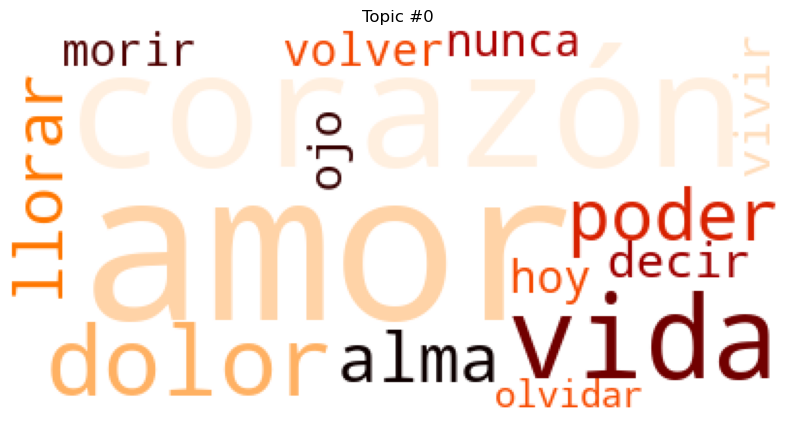

/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_

/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pil

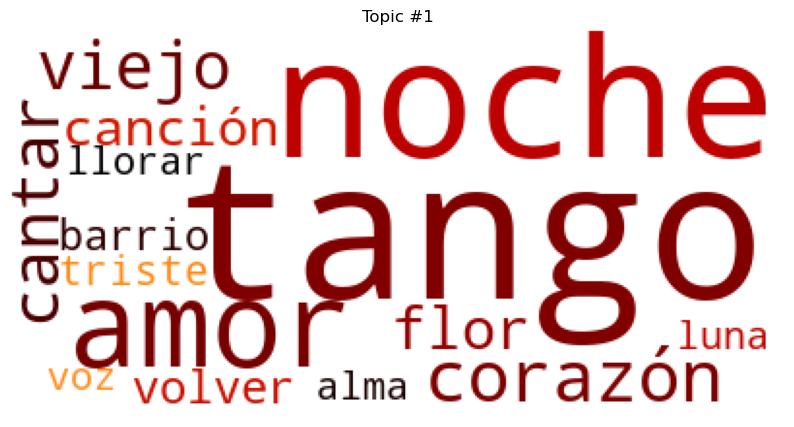

/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in

/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/krystiankrystkowiak/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in

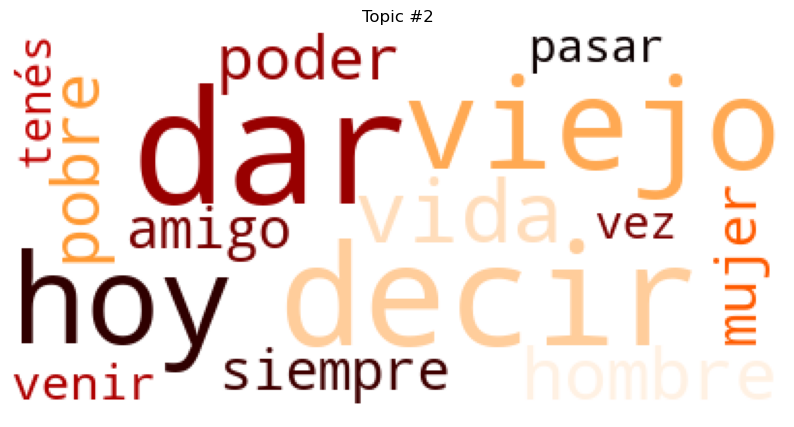

In [1294]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_words = 15 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud(background_color ='white', colormap="gist_heat_r").fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# KMEANS

In [1348]:
doc_topic_df

,DARK LOVE,SUBURB MUSIC,DREAMS OF LOVE
0,0.14585,0.02982,0.02916
1,0.07548,0.00000,0.22111
2,0.04471,0.05485,0.15626
3,0.07141,0.04484,0.20627
4,0.09767,0.13220,0.02160
...,...,...,...
2466,0.17829,0.22243,0.25641
2467,0.07917,0.06582,0.00813
2468,0.14981,0.00000,0.00000
2469,0.08846,0.00000,0.17487


In [1349]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it

def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [1350]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=16) 
km.fit(doc_topic_df)
km.labels_

array([12, 14, 14, ..., 12, 14,  6], dtype=int32)

In [1351]:
labels = km.labels_

SSEs = []
Sil_coefs = []

for num_clusters in range(2,20):
    km = KMeans(n_clusters=num_clusters) 
    km.fit(doc_topic_df)
    inertia.append(km.inertia_)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(doc_topic_df,labels, metric='cosine'))
    SSEs.append(get_SSE(doc_topic_df, labels)) # The SSE is just inertia, we
                                          # could have just said km.inertia_
Sil_coefs


[0.5629778107399075,
 0.513216721783491,
 0.5063811231000778,
 0.1859922245534099,
 0.06470899083636354,
 0.06244444456562759,
 0.021875115736666402,
 -0.0993865800476958,
 -0.09661835506015545,
 -0.1556040249995908,
 -0.1588314413413081,
 -0.1350753901315049,
 -0.15134242174915372,
 -0.15045296074620695,
 -0.16527948651425503,
 -0.1805833489535217,
 -0.19215028427683453,
 -0.1970668089128846]

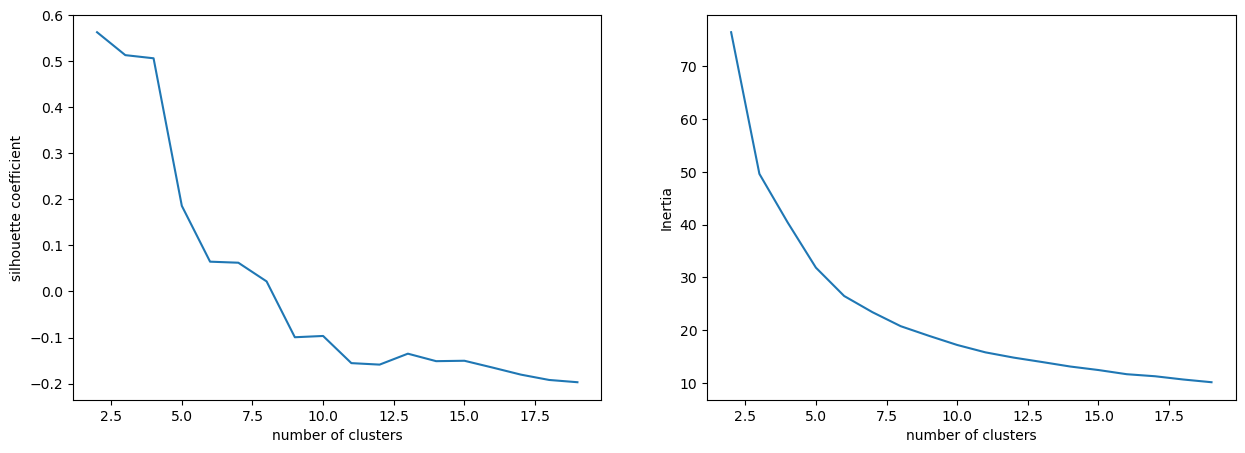

In [1352]:
# number of clusters for kmeans
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# Sum of Square Error
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('Inertia');

# 7 CLUSTERS?